# __Comparative Analysis of Maize and Coffee: Profitability and Market Trends in Kenya(2017-2022)__

## Introduction 
Coffee and maize are well known crops in Kenya. This notebook presents a comparative analysis of the productivity and profitability of maize and coffee using the provided data. This will involve analyzing various metrics like price indices, gross value, and sales volumes over the years 2018-2022.
I will identify which crop delivers higher value to farmers and the national economy.
I'll structure this project to answer several key research questions which I will formulate based on the data provided by [KENYA NATIONAL BUREAU OF STATISTICS (KNBS)](https://www.knbs.or.ke/portals/)


## 1. Business Understanding
Kenya's agricultural sector is the backbone of its economy, and maize and coffee play distinct but vital roles.

* __Maize__


It serves as the pillar of national food security and rural livelihoods. It is the country's most important staple food, providing roughly a third of the caloric intake for the population, and is grown by an estimated 98% of Kenya's 3.5 million smallholder farmers. The maize value chain directly and indirectly supports over 6 million Kenyans. However, the sector faces significant challenges, including low yields, high post-harvest losses, and an over-reliance on rainfed agriculture, which makes it vulnerable to climate shocks.   

* __Coffee__
  
It is a strategic export commodity and a key driver of foreign exchange. Kenya is globally recognized for its high-quality Arabica beans, which command a premium in the international market . The sector employs about 30% of the agricultural labor force and provides a livelihood for more than 800,000 rural households. While coffee contributes to a smaller portion of total agricultural value than other crops, it is a crucial earner of foreign currency, generating around $200 million annually . The industry's long-term production has declined, and it is highly susceptible to global market volatility and recent, disruptive government policy changes .   



### Research Questions
* What is the total marketed value for maize and coffee(KSh Million)?
* What is the average farm-gate prices and retail market prices for maize and coffee, and evaluate profitability margins?
* What is he relationship between total estimated production and sales to marketing boards for both crops, showing the share of production entering markets?
* Which of the two crops, maize or coffee, demonstrates stronger profitability and market resilience based on combined indicators?


### Objectives
* To find out and compare the total marketed value for maize and coffee(KSh Million)
* To find out and compare the average farm-gate prices and retail market prices for maize and coffee, and evaluate profitability margins.
* To find out the relationship between total estimated production and sales to marketing boards for both crops, showing the share of production entering markets
* To find out which crop demonstrates stronger profitability and market resilience based on combined indicators

## 2. Data Understanding

In this notebook, i will be working with different columns inorder find answers to the research questions stated above.
We'll be working with the following columns-:```indices```, ```indicator```, ```agri-products```, ```type-of-grower```, ```type-of-indicator```, ```Unit```, ```Date```, ```Value```

*  'indicator',
     - __Sale of selected crops to marketing boards ```(000 tonnes)```__
       
           *  This number tells us the total volume of crops sold to a specific group of buyers (marketing boards). This helps us understand how much of the harvest was sold through these official channels.                   
     - __Recorded Marketed Agricultural Production at Current Prices ```(KSh Million)```__
       
           *  It's the total amount of money, in millions of Kenyan Shillings, that farmers got for selling their maize and coffee each year. This is the number you'll use to talk about total "revenue" or "profitability" in your report.
     - __Average gross commodity to farmers ```(KSh/100kg)```__
       
           *  This is a very specific number. It's the price a farmer received for a single bag or kilogram of their crop. This helps us see if the price farmers were getting was going up or down. Think of this as the "price per item" for the farmer.   
     - __Average retail market prices of selected food crops ```(KSh per kg, half-year)```__
       
           *  This is the price that people, the consumers, paid for the crops in the shops and markets. This is a different number than what the farmer got, and the difference is where the "value chain" comes in.  
     - __Estimated production of selected agricultural commodities ```(Million bags)```__
       
           *  This is the total volume of the crop that was actually harvested. It is different from the volume sold. This is an important distinction to see if farmers are selling everything they grow or if there are losses.

*  'agri-products',

    -  ```maize```
    -  ```coffee```

*  'type-of-grower',
    - Co operatives
    - Estates
    - Non-contracted farmers
    - Total

*  'type-of-indicator',
    - Value
    - Volume

*  'Unit',
*  'Date',
*  'Value'



## 3.Load the Dataset with Pandas
Import the following -:

* pandas with the standard alias pd
* numpy with the standard alias np
* seaborn with the standard alias sns
* matplotlib.pyplot with the standard alias plt
* set %matplotlib inline so the graphs will display immediately below the cell that creates them.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 4. Data Exploration
load the datasets

In [3]:
# This is the full dataset
df_full = pd.read_csv("data/full_dataset_2018_2022.csv")
df_full.head()

,indices,indicator,agri-products,type-of-grower,type-of-indicator,Unit,Date,Value
0,Price indices total,Quantum and Price Indices of Recorded Sales of...,CEREALS-,Total,Index,Base=100,2018,100.0
1,Price indices total,Quantum and Price Indices of Recorded Sales of...,CEREALS-,Total,Index,Base=100,2019,118.9
2,Price indices total,Quantum and Price Indices of Recorded Sales of...,CEREALS-,Total,Index,Base=100,2020,113.6
3,Price indices total,Quantum and Price Indices of Recorded Sales of...,CEREALS-,Total,Index,Base=100,2021,123.8
4,Price indices total,Quantum and Price Indices of Recorded Sales of...,CEREALS-,Total,Index,Base=100,2022,166.5


In [3]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 674 entries, 0 to 673
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   indices            674 non-null    object 
 1   indicator          674 non-null    object 
 2   agri-products      674 non-null    object 
 3   type-of-grower     674 non-null    object 
 4   type-of-indicator  674 non-null    object 
 5   Unit               674 non-null    object 
 6   Date               674 non-null    object 
 7   Value              674 non-null    float64
dtypes: float64(1), object(7)
memory usage: 42.3+ KB


In [4]:
# check that it is a dataframe
assert type(df_full) == pd.DataFrame

I have loaded the full dataset and this is confirmed by the ```agri-products``` column which contains all the crops.
In this notebook i want to compare two crops, ```Coffee``` and ```Maize```.
Specify the crops to filter for.


In [5]:
# Let's specify the crops you want to filter for.

target_crops = ['Maize', 'Coffee']

Subset to get a dataframe that only contains coffee and maize

In [6]:
# Filter the DataFrame to show only the crops in the target crops.
df = df_full[df_full["agri-products"].isin(target_crops)]
df.head()

,indices,indicator,agri-products,type-of-grower,type-of-indicator,Unit,Date,Value
70,Indices total,Recorded Marketed Agricultural Production at C...,Maize,Total,Value,KSh Million,2018,9986.9
71,Indices total,Recorded Marketed Agricultural Production at C...,Maize,Total,Value,KSh Million,2019,10681.2
72,Indices total,Recorded Marketed Agricultural Production at C...,Maize,Total,Value,KSh Million,2020,8232.5
73,Indices total,Recorded Marketed Agricultural Production at C...,Maize,Total,Value,KSh Million,2021,6858.1
74,Indices total,Recorded Marketed Agricultural Production at C...,Maize,Total,Value,KSh Million,2022,5938.4


## 5. Data Preparation

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 70 to 409
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   indices            48 non-null     object 
 1   indicator          48 non-null     object 
 2   agri-products      48 non-null     object 
 3   type-of-grower     48 non-null     object 
 4   type-of-indicator  48 non-null     object 
 5   Unit               48 non-null     object 
 6   Date               48 non-null     object 
 7   Value              48 non-null     float64
dtypes: float64(1), object(7)
memory usage: 3.4+ KB


In [ ]:
"""
It is a dataframe
It has 48 rows and 8 columns
the d-types are float and object
"""

In [8]:
# check for missing values
df.isnull().sum()

indices              0
indicator            0
agri-products        0
type-of-grower       0
type-of-indicator    0
Unit                 0
Date                 0
Value                0
dtype: int64

In [9]:
df.head()

,indices,indicator,agri-products,type-of-grower,type-of-indicator,Unit,Date,Value
70,Indices total,Recorded Marketed Agricultural Production at C...,Maize,Total,Value,KSh Million,2018,9986.9
71,Indices total,Recorded Marketed Agricultural Production at C...,Maize,Total,Value,KSh Million,2019,10681.2
72,Indices total,Recorded Marketed Agricultural Production at C...,Maize,Total,Value,KSh Million,2020,8232.5
73,Indices total,Recorded Marketed Agricultural Production at C...,Maize,Total,Value,KSh Million,2021,6858.1
74,Indices total,Recorded Marketed Agricultural Production at C...,Maize,Total,Value,KSh Million,2022,5938.4


In [10]:
# reset the dataframes index
df = df.reset_index()

In [11]:
df.head()

,index,indices,indicator,agri-products,type-of-grower,type-of-indicator,Unit,Date,Value
0,70,Indices total,Recorded Marketed Agricultural Production at C...,Maize,Total,Value,KSh Million,2018,9986.9
1,71,Indices total,Recorded Marketed Agricultural Production at C...,Maize,Total,Value,KSh Million,2019,10681.2
2,72,Indices total,Recorded Marketed Agricultural Production at C...,Maize,Total,Value,KSh Million,2020,8232.5
3,73,Indices total,Recorded Marketed Agricultural Production at C...,Maize,Total,Value,KSh Million,2021,6858.1
4,74,Indices total,Recorded Marketed Agricultural Production at C...,Maize,Total,Value,KSh Million,2022,5938.4


In [12]:
# drop the index column
#rename the level_0 column as the index
df.drop(columns = "index", inplace = True)


print first five rows

In [13]:
df.head()

,indices,indicator,agri-products,type-of-grower,type-of-indicator,Unit,Date,Value
0,Indices total,Recorded Marketed Agricultural Production at C...,Maize,Total,Value,KSh Million,2018,9986.9
1,Indices total,Recorded Marketed Agricultural Production at C...,Maize,Total,Value,KSh Million,2019,10681.2
2,Indices total,Recorded Marketed Agricultural Production at C...,Maize,Total,Value,KSh Million,2020,8232.5
3,Indices total,Recorded Marketed Agricultural Production at C...,Maize,Total,Value,KSh Million,2021,6858.1
4,Indices total,Recorded Marketed Agricultural Production at C...,Maize,Total,Value,KSh Million,2022,5938.4


In [14]:
# rename the columns 
df = df.rename(columns = {
    "agri-products" : "crops",
    "Unit" : "unit",
    "Date" : "year",
    "Value" : "value"
})

In [15]:
df["year"].value_counts()

year
2018      7
2019      7
2020      7
2021      7
2022      7
2017      3
2018H1    1
2018H2    1
2019H1    1
2019H2    1
2020H1    1
2020H2    1
2021H1    1
2021H2    1
2022H1    1
2022H2    1
Name: count, dtype: int64

In [17]:
# fix the date/ year column
# make sure all dates are strings
df["year"] = df["year"].astype(str)

# make a new column called "half"
df["half"] = df["year"].apply(lambda x: x[-2] if "H" in x else "FullYear")

# now clean the year and extract the year only
df["year"] = df["year"].str[:4].astype(int)

## 6. Data Visualization and Analysis

In [18]:
df["indicator"].value_counts()

indicator
Sale of selected crops to marketing boards                     12
Recorded Marketed Agricultural Production at Current Prices    10
Average gross commodity to farmers                             10
Average retail market prices of selected food crops            10
Estimated production of selected agricultural commodities       6
Name: count, dtype: int64

### _To find out and compare the total marketed value for maize and coffee(KSh Million)_
Which crop brought in more money?

We will look at the Total Marketed Value for both maize and coffee. Think of this as the total amount of money all the farmers and sellers made from these crops in a given year.

By comparing these values, which are measured in millions of Kenyan Shillings (KSh Million), we can see which crop is a bigger business in terms of total income from sales.

We will tackle this objectives by working with subsetted dataframes

In [19]:
# subset a dataframe and call it df_market
df_market = df[df["indicator"] == "Recorded Marketed Agricultural Production at Current Prices"]
df_market.head()

,indices,indicator,crops,type-of-grower,type-of-indicator,unit,year,value,half
0,Indices total,Recorded Marketed Agricultural Production at C...,Maize,Total,Value,KSh Million,2018,9986.9,FullYear
1,Indices total,Recorded Marketed Agricultural Production at C...,Maize,Total,Value,KSh Million,2019,10681.2,FullYear
2,Indices total,Recorded Marketed Agricultural Production at C...,Maize,Total,Value,KSh Million,2020,8232.5,FullYear
3,Indices total,Recorded Marketed Agricultural Production at C...,Maize,Total,Value,KSh Million,2021,6858.1,FullYear
4,Indices total,Recorded Marketed Agricultural Production at C...,Maize,Total,Value,KSh Million,2022,5938.4,FullYear


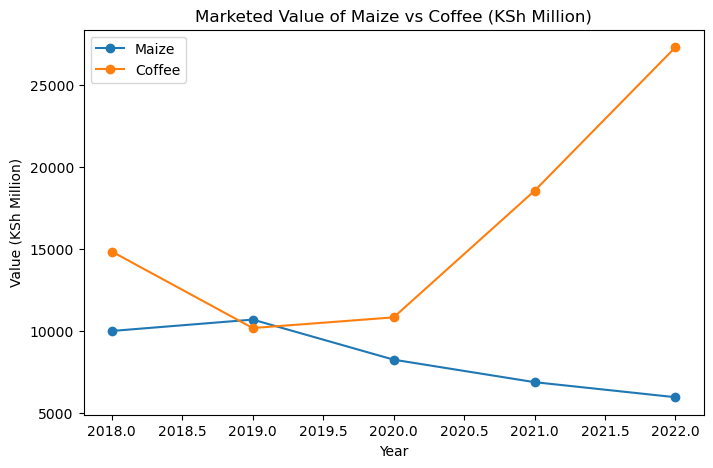

In [20]:
plt.figure(figsize=(8,5))

for crop in df_market['crops'].unique():
    crop_data = df_market[df_market['crops'] == crop]
    plt.plot(crop_data['year'], crop_data['value'], marker='o', label=crop)

plt.title("Marketed Value of Maize vs Coffee (KSh Million)")
plt.xlabel("Year")
plt.ylabel("Value (KSh Million)")
plt.legend()
plt.show()

In [ ]:
"""
Marketed Value Trends (Maize vs Coffee)

The line chart shows the marketed value of maize and coffee in Kenya between 2018 and 2022.  
- Coffee consistently generates a higher marketed value than maize.  
- From 2020 onwards, coffee shows strong growth, especially in 2021 and 2022.  
- Maize remains lower in value and shows a slight decline in recent years.  

Conclusion:
Coffee contributes more to Kenya’s marketed agricultural production compared to maize,
highlighting its stronger role in agricultural revenue.

"""

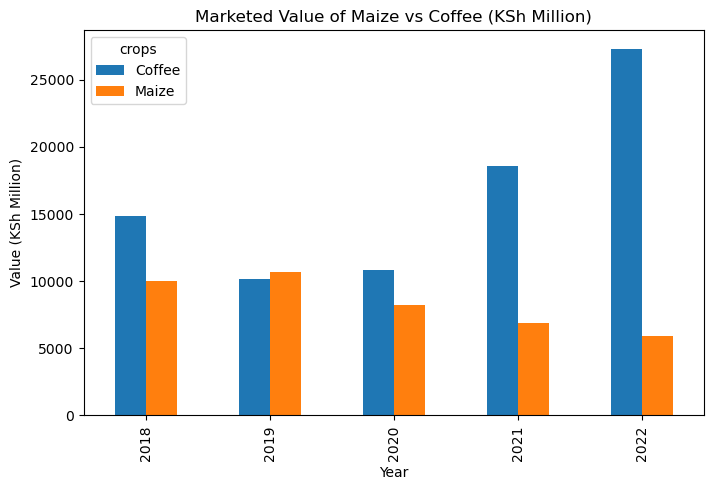

In [21]:
df_pivot = df_market.pivot(index='year', columns='crops', values='value')

df_pivot.plot(kind='bar', figsize=(8,5))
plt.title("Marketed Value of Maize vs Coffee (KSh Million)")
plt.xlabel("Year")
plt.ylabel("Value (KSh Million)")
plt.show()

In [ ]:
"""
Marketed Value Comparison (Maize vs Coffee)

The bar chart compares the marketed value of maize and coffee for each year.  
- In every year, coffee’s marketed value is higher than maize’s.  
- The gap widens noticeably in 2021 and 2022.  
- This suggests that coffee became increasingly important for Kenya’s marketed agricultural output in recent years.  

Conclusion:
Coffee dominates maize in marketed value, reinforcing its higher market importance.

"""

### _To find out and compare the average farm-gate prices and retail market prices for maize and coffee, and evaluate profitability margins._
In this part of our project, our main goal is to follow the money and understand the journey of maize and coffee from the farm to the market. We will focus on two key prices:

- Farm-gate price: This is the price the farmer gets paid for their crop directly at their farm.

- Retail market price: This is the final price that people pay for the crop in a shop or market.

By comparing these two prices, we can figure out the profitability margin. This margin is the extra money made by everyone else in the process—the millers, transporters, and sellers. Finding this margin will help us see if the farmers are getting a fair price and where the most value is added in the business of selling maize and coffee.

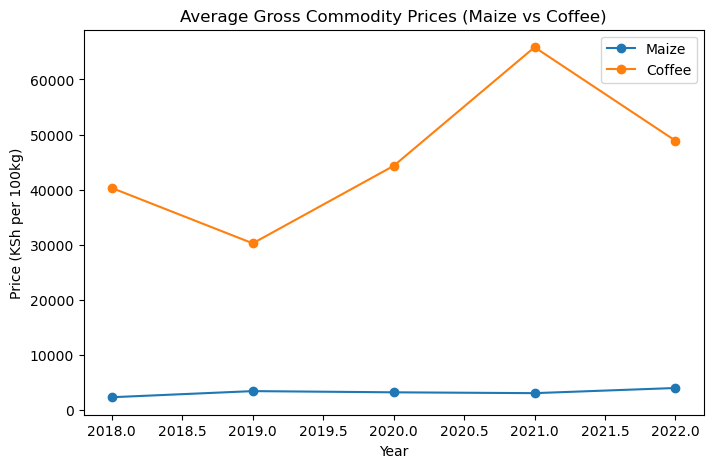

In [23]:
# subset
df_obj2 = df[df['indicator'] == "Average gross commodity to farmers"]

# plot

plt.figure(figsize=(8,5))
for crop in df_obj2['crops'].unique():
    crop_data = df_obj2[df_obj2['crops'] == crop]
    plt.plot(crop_data['year'], crop_data['value'], marker='o', label=crop)

plt.title("Average Gross Commodity Prices (Maize vs Coffee)")
plt.xlabel("Year")
plt.ylabel("Price (KSh per 100kg)")
plt.legend()
plt.show()

In [ ]:
"""
Average Gross Commodity Prices

The line chart shows farm-gate prices for maize and coffee between 2018 and 2022.  
- Coffee fetches a much higher price per 100kg compared to maize.  
- Coffee prices rise sharply after 2020, while maize remains relatively stable.  

Conclusion: 
Coffee provides higher farmer-level returns, making it more profitable per unit sold than maize.

"""

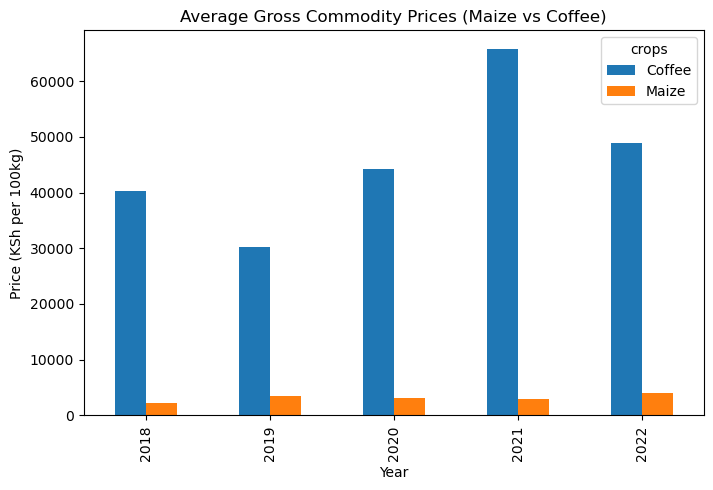

In [27]:
df_pivot = df_obj2.pivot(index='year', columns='crops', values='value')

df_pivot.plot(kind='bar', figsize=(8,5))
plt.title("Average Gross Commodity Prices (Maize vs Coffee)")
plt.xlabel("Year")
plt.ylabel("Price (KSh per 100kg)")
plt.show()

### _To find out the relationship between total estimated production and sales to marketing boards for both crops, showing the share of production entering markets_
In this step, we will compare two important numbers to understand how much of each crop makes it to the market.

First, we have the total estimated production, which is the total amount of a crop that farmers grew in a given year. Think of this as the entire harvest.

Second, we have the sales to marketing boards, which is the amount of that harvest that was officially sold to a specific, organized buyer.

By comparing these two numbers, we can figure out what percentage of the total crop was sold through official channels. This helps us see how much of the harvest is entering the formal market and how much might be used by the farmers themselves or sold in other ways.

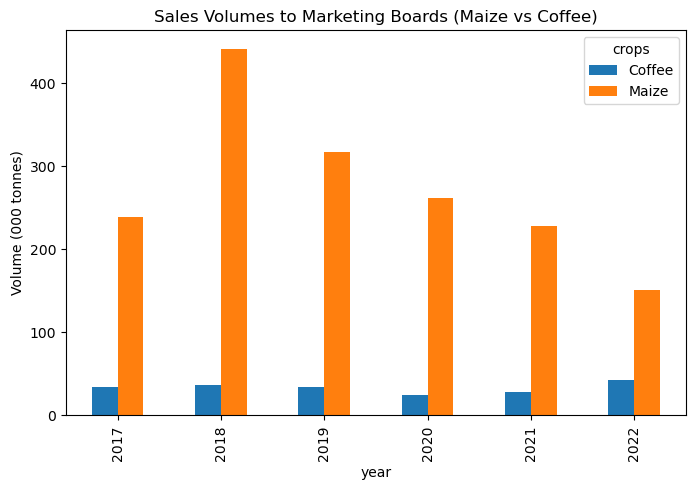

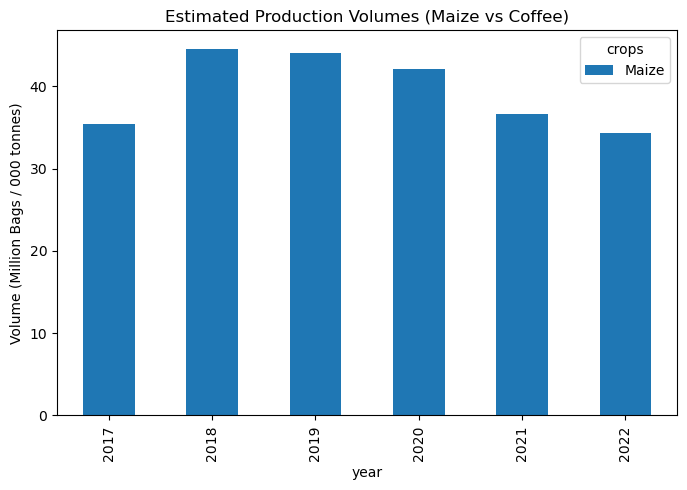

In [28]:
df_sales = df[df['indicator'] == "Sale of selected crops to marketing boards"]
df_prod = df[df['indicator'] == "Estimated production of selected agricultural commodities"]

# Sales volumes
df_sales.pivot(index='year', columns='crops', values='value').plot(kind='bar', figsize=(8,5))
plt.title("Sales Volumes to Marketing Boards (Maize vs Coffee)")
plt.ylabel("Volume (000 tonnes)")
plt.show()

# Production volumes
df_prod.pivot(index='year', columns='crops', values='value').plot(kind='bar', figsize=(8,5))
plt.title("Estimated Production Volumes (Maize vs Coffee)")
plt.ylabel("Volume (Million Bags / 000 tonnes)")
plt.show()

In [ ]:
"""
Sales and Production Volumes

- Sales to marketing boards:
          Maize is sold in larger volumes compared to coffee, though sales have declined in recent years.  
- Production estimates:
          Maize is produced in much larger quantities than coffee, reflecting its role as a staple food.  

Conclusion:
While coffee dominates in marketed value and prices, maize dominates in sheer production and sales volumes,
highlighting its importance for food security.

"""

### _To find out which crop demonstrates stronger profitability and market resilience based on combined indicators_
This is the final and most important goal of our project. It's where we bring all the different pieces of our analysis together to form a big-picture conclusion.

To figure out which crop has stronger profitability, we will combine the numbers we've already found. We'll look at the total money each crop made, and the prices that farmers and sellers got, to see which one creates more wealth overall.

To find out about market resilience, we will look at how well each crop handles challenges. By comparing the total amount of each crop that was harvested with the amount that was actually sold, we can see which crop has a stronger and more stable business from the farm to the market.

By putting all these insights together, we will have a strong, data-backed answer to our main research question.

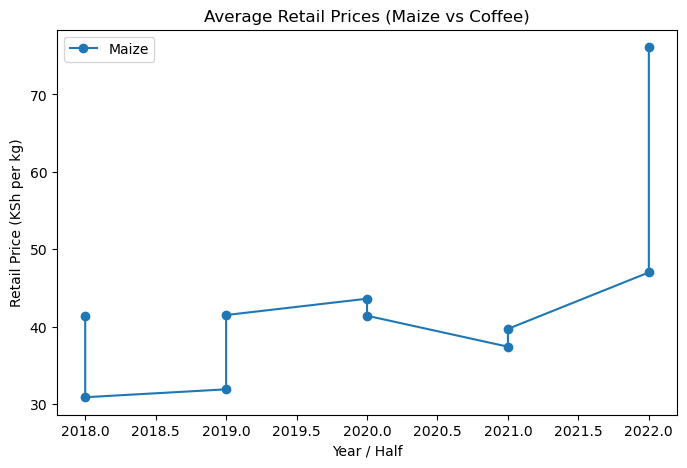

In [29]:
df_obj4 = df[df['indicator'] == "Average retail market prices of selected food crops"]

plt.figure(figsize=(8,5))
for crop in df_obj4['crops'].unique():
    crop_data = df_obj4[df_obj4['crops'] == crop]
    plt.plot(crop_data['year'], crop_data['value'], marker='o', label=crop)

plt.title("Average Retail Prices (Maize vs Coffee)")
plt.xlabel("Year / Half")
plt.ylabel("Retail Price (KSh per kg)")
plt.legend()
plt.show()

In [ ]:
"""
Average Retail Market Prices

The chart compares consumer retail prices of maize and coffee.  
- Coffee consistently sells at a far higher retail price than maize.  
- Retail maize prices are lower and more stable, showing only gradual increases.  
- Coffee shows a sharp price rise after 2020.  

Conclusion:
Coffee dominates retail prices, making it a more valuable crop at consumer markets compared to maize.

"""

## Final Summary of Analysis – Coffee vs Maize in Kenya

This notebook set out to compare **coffee** and **maize** in terms of marketed value, farmer returns, retail prices, and production volumes using agricultural data from 2018–2022. The CRISP-DM framework guided the process from data preparation to analysis.


## Overall Conclusion
- **Coffee** is Kenya’s stronger performer in terms of revenue and profitability, both for farmers and at retail markets.  
- **Maize** remains vital for national food security due to its large-scale production and consumption, but its economic value per unit is much lower.  
- This duality highlights Kenya’s agricultural balance: coffee as a cash crop, maize as a staple crop.



## Recommendations
1. **For Policy Makers:**  
   - Support maize productivity improvements to stabilize supply and reduce market declines.  
   - Strengthen coffee export strategies to maintain and grow its revenue contribution.  

2. **For Farmers:**  
   - Coffee farmers can benefit from the rising price trends, but diversification with maize ensures food security.  
   - Maize farmers may need support with modern farming techniques to improve yields without increasing costs.   

3. **For Future Work:**  
   - Extend this analysis to other crops (tea, sugarcane) for a broader agricultural market view.  
   - Include external factors (climate data, export demand, government policies) to enrich insights.